In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_iris, load_diabetes
import pandas as pd
import seaborn as sns

**DATA IMPORT**
Data are loaded from sklearn library.
diabetes data been loaded from local CSV file

In [119]:
breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer_data.data, columns=breast_cancer_data.feature_names)

iris_data = load_iris()
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

diabetes_df = pd.read_csv("/content/diabetes.csv")

**Displaying first five rows of imported Dataset.**

In [120]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [121]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [122]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Function**
There are 3 user defined function.
The first function is created to apply algorithm like KNN, Decision Tree, Random Forest.
The Second function is to perform PCA
The third function is to perform LDA

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def class_func(x,y,algo,dataset):
    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
    if( algo == "KNN"):
      knn = KNeighborsClassifier(n_neighbors=2)
      knn.fit(xtrain, ytrain)

      y_pred = knn.predict(xtest)

      accuracy = accuracy_score(ytest, y_pred)
      precision = precision_score(ytest, y_pred, average='weighted')
      recall = recall_score(ytest, y_pred, average='weighted')
      f1 = f1_score(ytest, y_pred, average='weighted')
      cm = confusion_matrix(ytest, y_pred)
      print(f'Accuracy: {accuracy:.2f}')
      print(f'Precision: {precision:.2f}')
      print(f'Recall: {recall:.2f}')
      print(f'F1-Score: {f1:.2f}')
      print("------------------------------")
      conf_matrix = confusion_matrix(ytest, y_pred)
      plt.figure(figsize=(8, 6))
      sns.heatmap(conf_matrix, annot=True, fmt='d')
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.title(f"{dataset} {algo} Confusion Matrix")
      plt.show()
      print("------------------------------")

    elif (algo == "RF"):
      random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
      random_forest.fit(xtrain, ytrain)

      y_pred = random_forest.predict(xtest)

      accuracy = accuracy_score(ytest, y_pred)
      precision = precision_score(ytest, y_pred, average='weighted')
      recall = recall_score(ytest, y_pred, average='weighted')
      f1 = f1_score(ytest, y_pred, average='weighted')
      cm = confusion_matrix(ytest, y_pred)
      print(f'Accuracy: {accuracy:.2f}')
      print(f'Precision: {precision:.2f}')
      print(f'Recall: {recall:.2f}')
      print(f'F1-Score: {f1:.2f}')
      print("------------------------------")
      conf_matrix = confusion_matrix(ytest, y_pred)
      plt.figure(figsize=(8, 6))
      sns.heatmap(conf_matrix, annot=True, fmt='d')
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.title(f"{dataset} {algo} Confusion Matrix")
      plt.show()
      print("------------------------------")

    else :

      DT = DecisionTreeClassifier(criterion = 'gini', random_state=1)
      DT.fit(xtrain, ytrain)

      y_pred = DT.predict(xtest)

      accuracy = accuracy_score(ytest, y_pred)
      precision = precision_score(ytest, y_pred, average='weighted')
      recall = recall_score(ytest, y_pred, average='weighted')
      f1 = f1_score(ytest, y_pred, average='weighted')
      cm = confusion_matrix(ytest, y_pred)
      print(f'Accuracy: {accuracy:.2f}')
      print(f'Precision: {precision:.2f}')
      print(f'Recall: {recall:.2f}')
      print(f'F1-Score: {f1:.2f}')
      print("------------------------------")



def pca_fun(xVAL,Yiris,dataset):
    pca = PCA(n_components=2)
    Xdata = pca.fit_transform(xVAL)

    variance_ratios = pca.explained_variance_ratio_
    print("------------------------------")
    print("Variance of the coefficients:")
    print(variance_ratios)
    print("------------------------------")
    class_func(Xdata,Yiris,"KNN",f"{dataset} PCA")
    class_func(Xdata,Yiris,"RF",f"{dataset} PCA")
    class_func(Xdata,Yiris,"DT",f"{dataset} PCA")

def lda_func(xVAL,Yiris,dataset):
    lda = LinearDiscriminantAnalysis()
    lda.fit(xVAL, Yiris)
    X_train_lda = lda.transform(xVAL)
    print("------------------------------")
    class_func(X_train_lda,Yiris,"KNN",f"{dataset} LDA")
    class_func(X_train_lda,Yiris,"RF",f"{dataset} LDA")
    class_func(X_train_lda,Yiris,"DT",f"{dataset} LDA")

**Function Call**
Function call with different dataset
and their result metrics

**Metrics**

* f1score
* Accuracy
* Precision
* Recall
* Confusion Metrics

after applying PCA and LDA separatively on the original data .
PCA performed good on KNN classifiers there was increase in accuracy and other metrices.
also after applying LDA on diabetes dataset there was a increse in the accuracy.
for some dataset after applying PCA or LDA there was decrease in the accuracy for some algorithms.

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
------------------------------


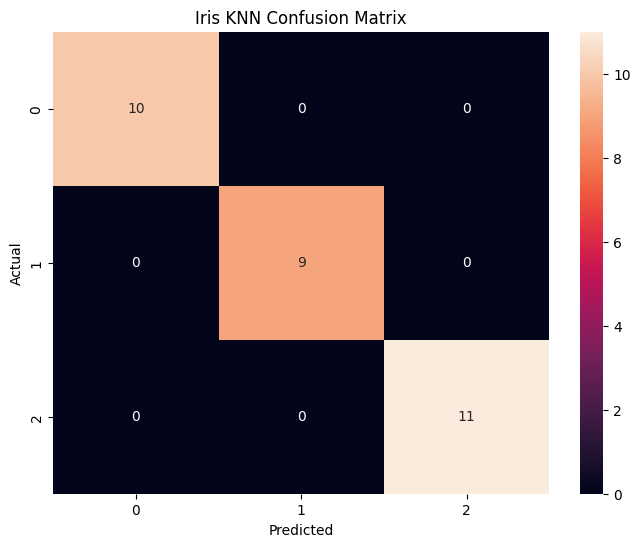

------------------------------
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
------------------------------


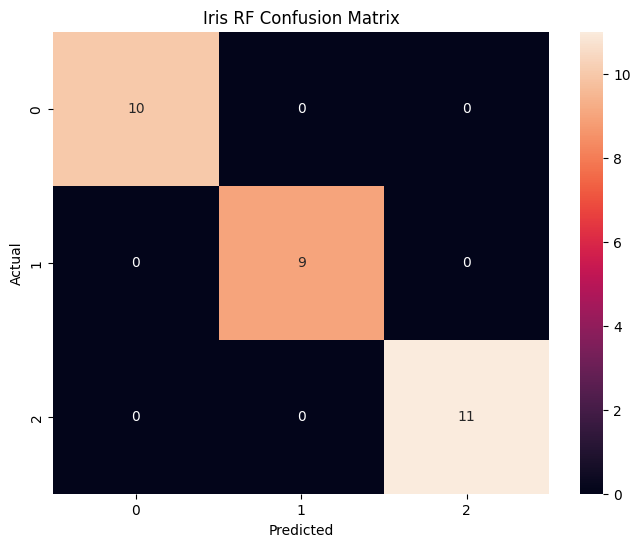

------------------------------
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
------------------------------


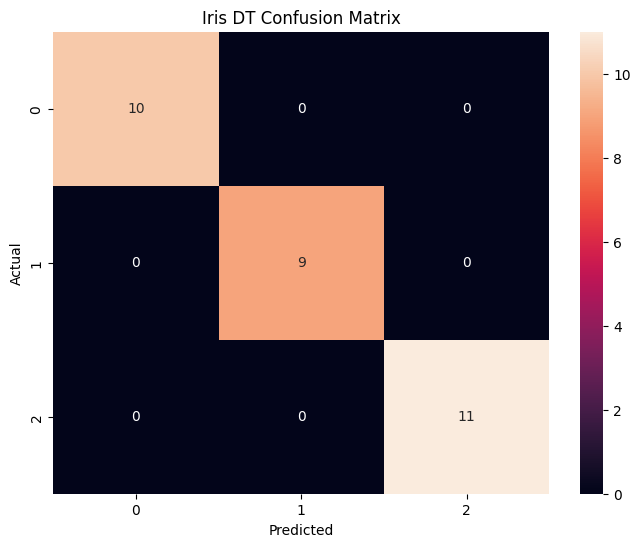

------------------------------
------------------------------
Variance of the coefficients:
[0.92461872 0.05306648]
------------------------------
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
------------------------------


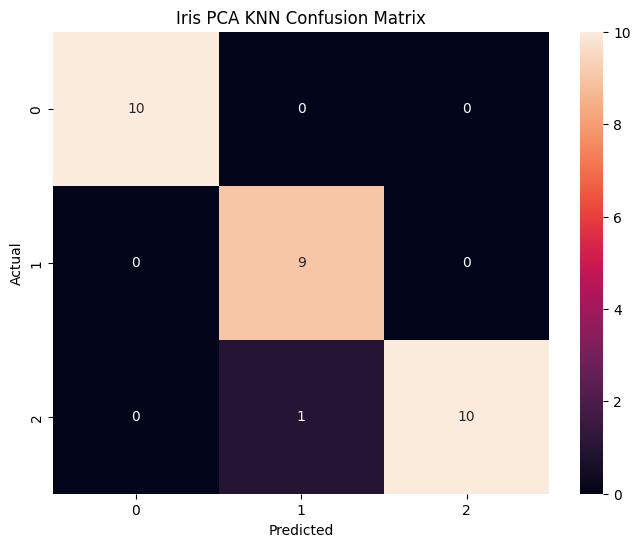

------------------------------
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
------------------------------


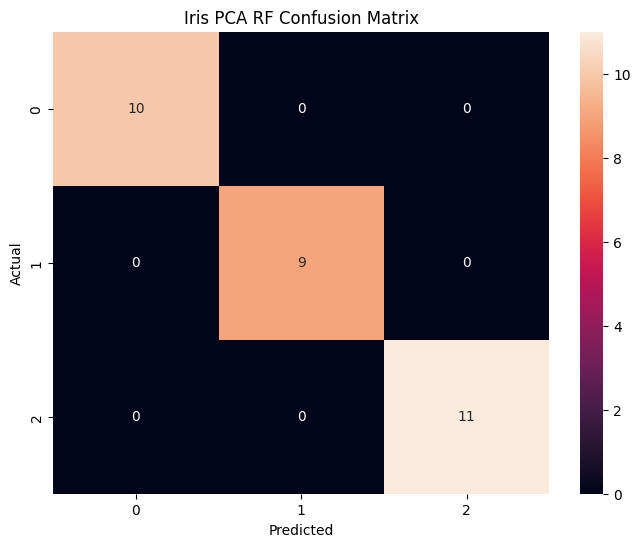

------------------------------
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
------------------------------


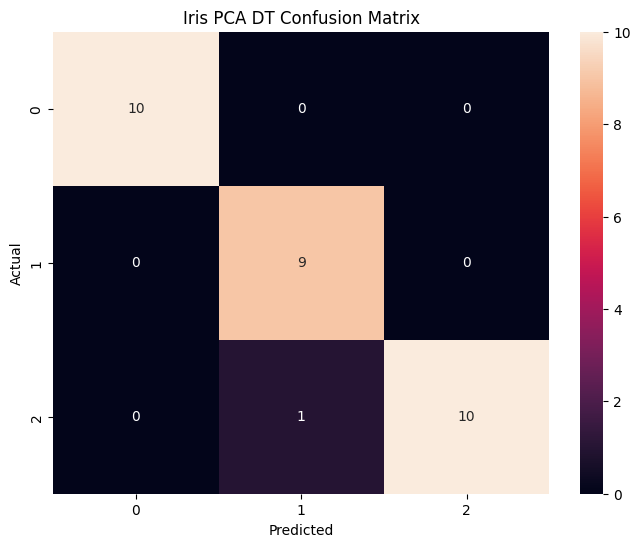

------------------------------
------------------------------
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
------------------------------


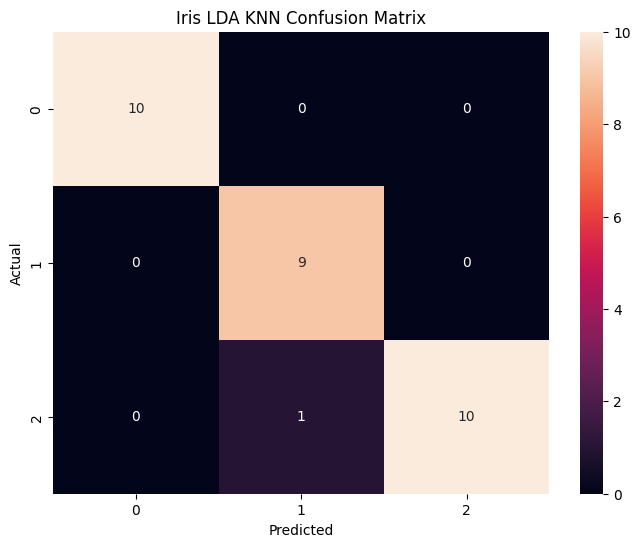

------------------------------
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
------------------------------


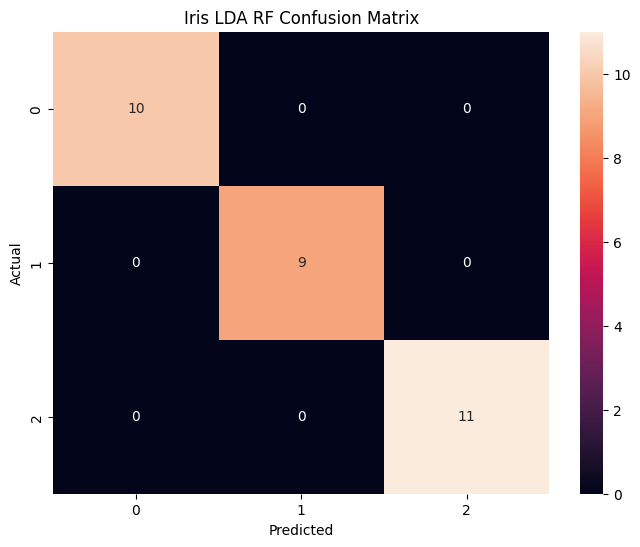

------------------------------
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
------------------------------


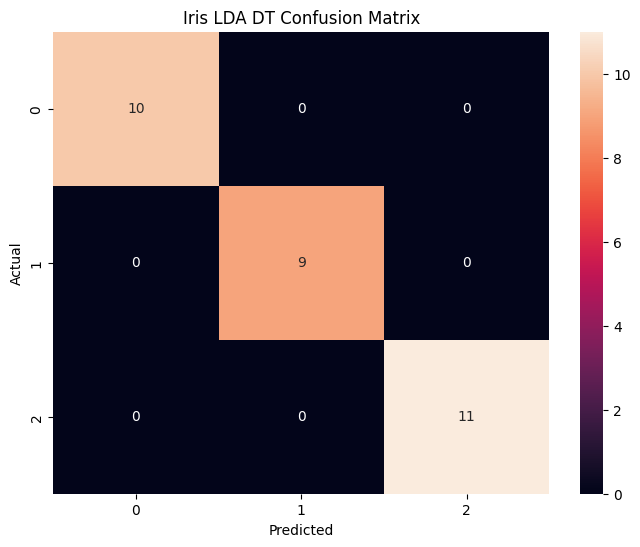

------------------------------
------------------------------
Accuracy: 0.70
Precision: 0.69
Recall: 0.70
F1-Score: 0.68
------------------------------


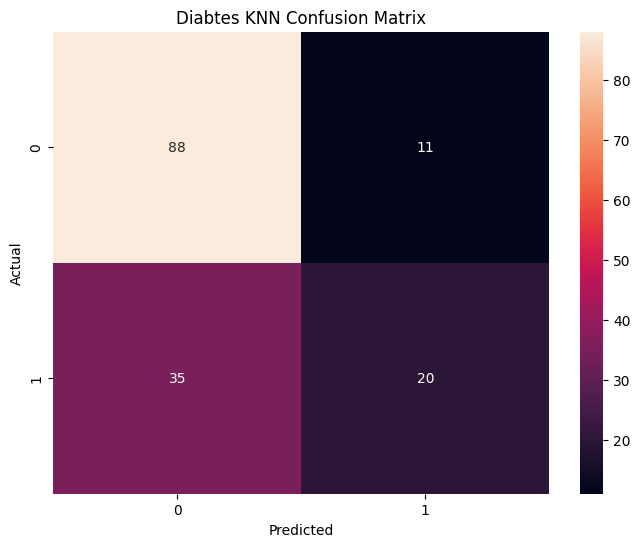

------------------------------
Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1-Score: 0.72
------------------------------


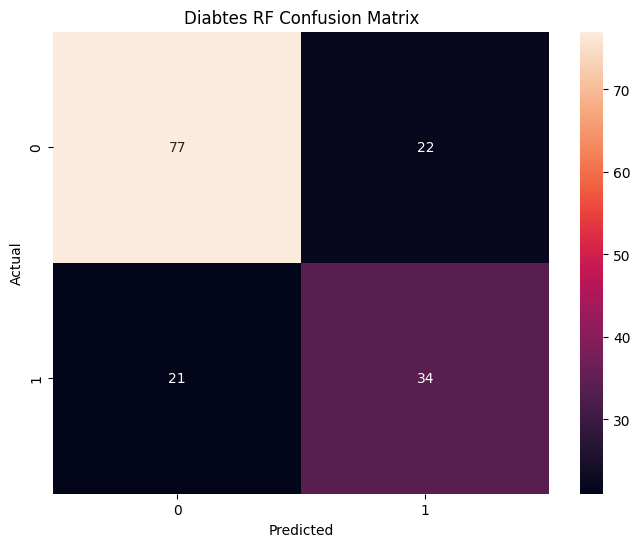

------------------------------
Accuracy: 0.73
Precision: 0.74
Recall: 0.73
F1-Score: 0.73
------------------------------


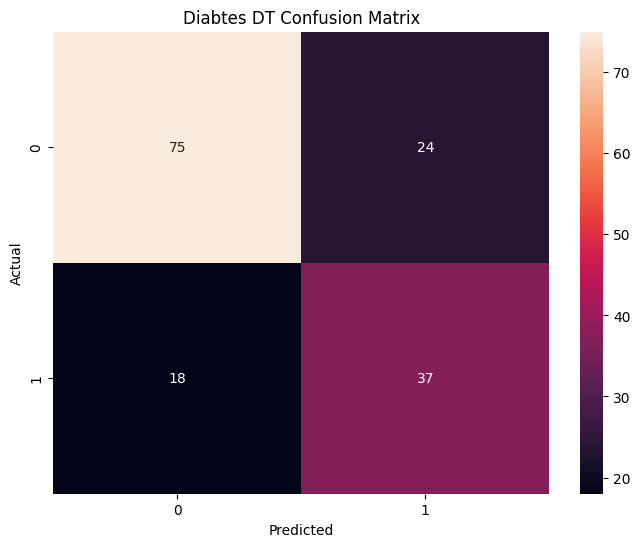

------------------------------
------------------------------
Variance of the coefficients:
[0.88854663 0.06159078]
------------------------------
Accuracy: 0.67
Precision: 0.65
Recall: 0.67
F1-Score: 0.63
------------------------------


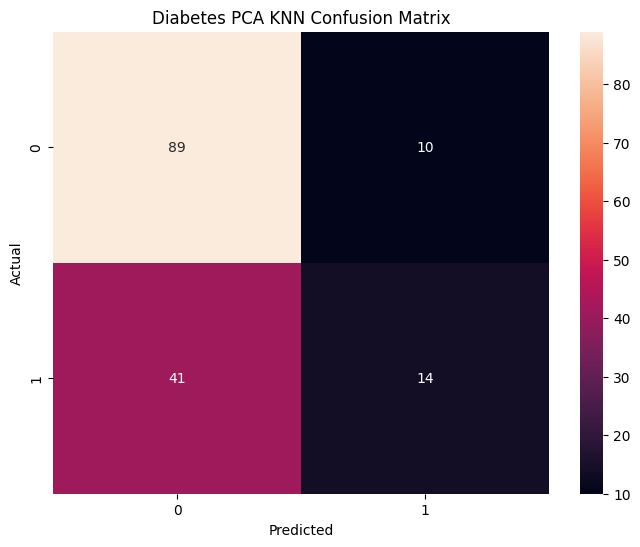

------------------------------
Accuracy: 0.69
Precision: 0.69
Recall: 0.69
F1-Score: 0.69
------------------------------


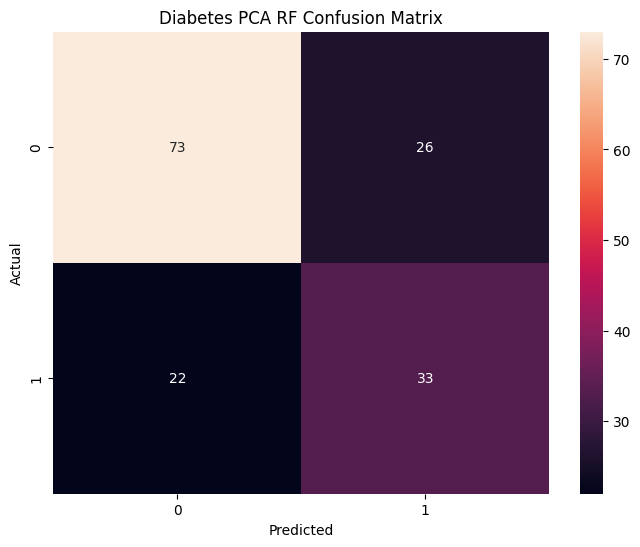

------------------------------
Accuracy: 0.67
Precision: 0.68
Recall: 0.67
F1-Score: 0.67
------------------------------


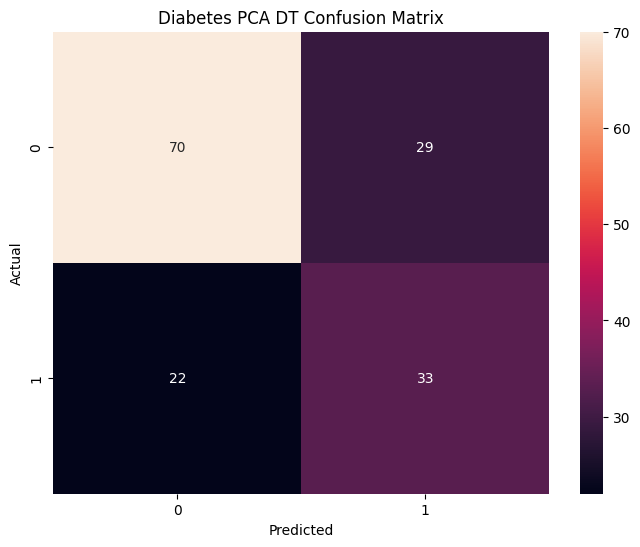

------------------------------
------------------------------
Accuracy: 0.78
Precision: 0.79
Recall: 0.78
F1-Score: 0.76
------------------------------


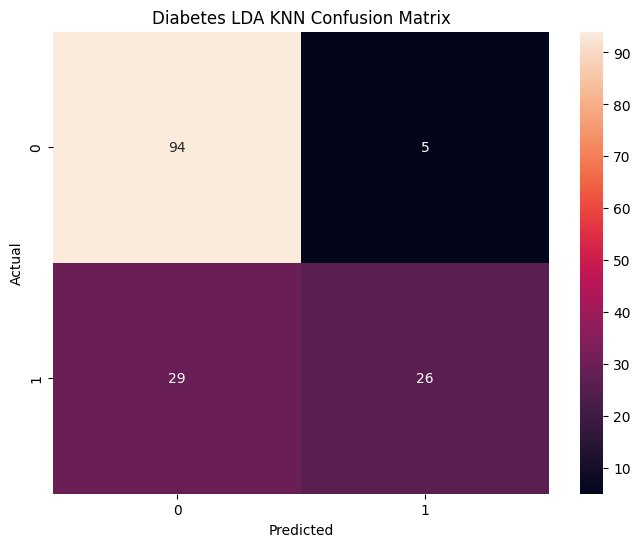

------------------------------
Accuracy: 0.72
Precision: 0.71
Recall: 0.72
F1-Score: 0.72
------------------------------


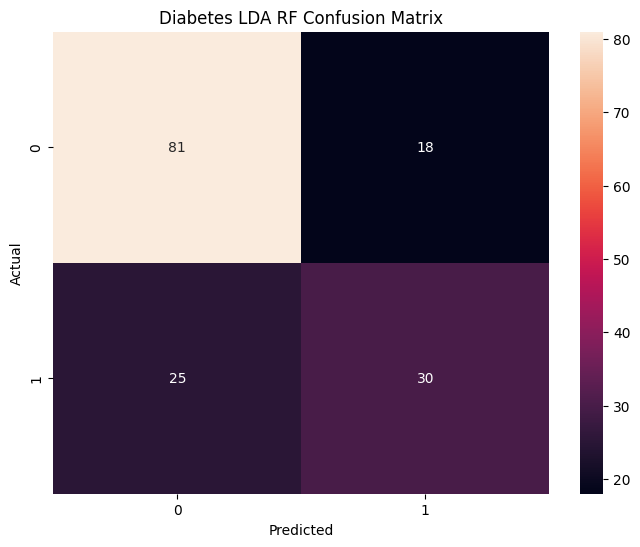

------------------------------
Accuracy: 0.72
Precision: 0.71
Recall: 0.72
F1-Score: 0.72
------------------------------


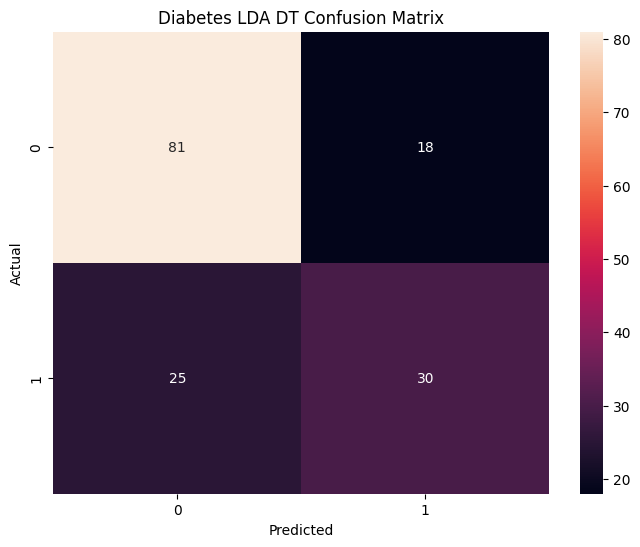

------------------------------
------------------------------
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93
------------------------------


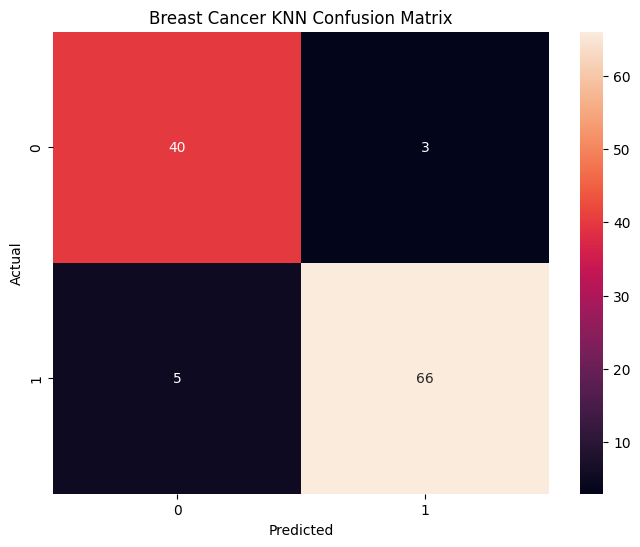

------------------------------
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1-Score: 0.96
------------------------------


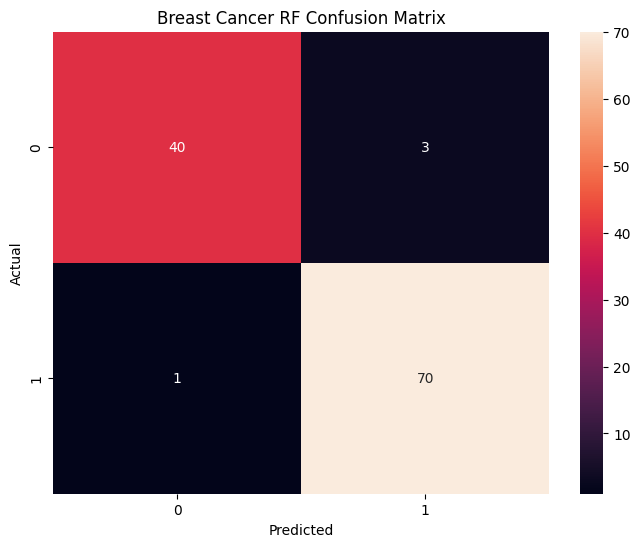

------------------------------
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1-Score: 0.94
------------------------------


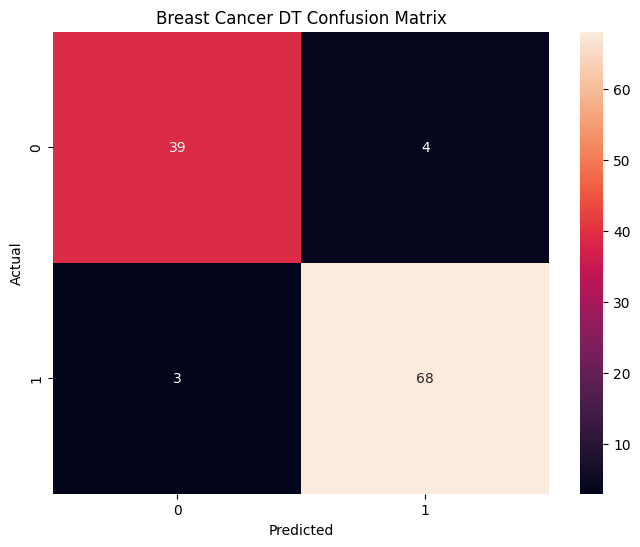

------------------------------
------------------------------
Variance of the coefficients:
[0.98204467 0.01617649]
------------------------------
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1-Score: 0.92
------------------------------


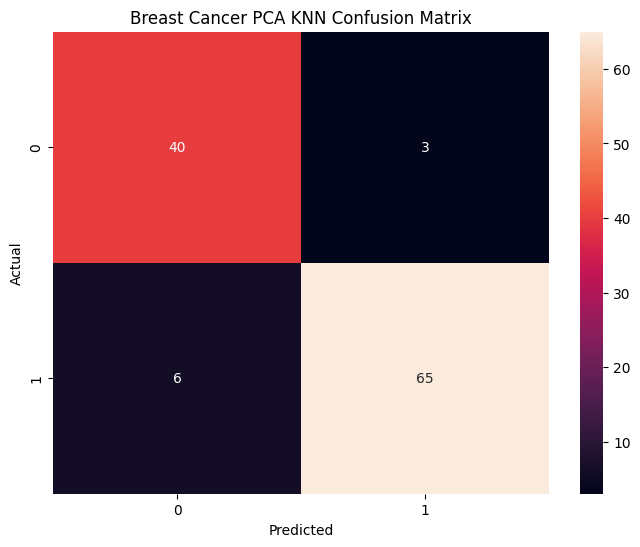

------------------------------
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-Score: 0.96
------------------------------


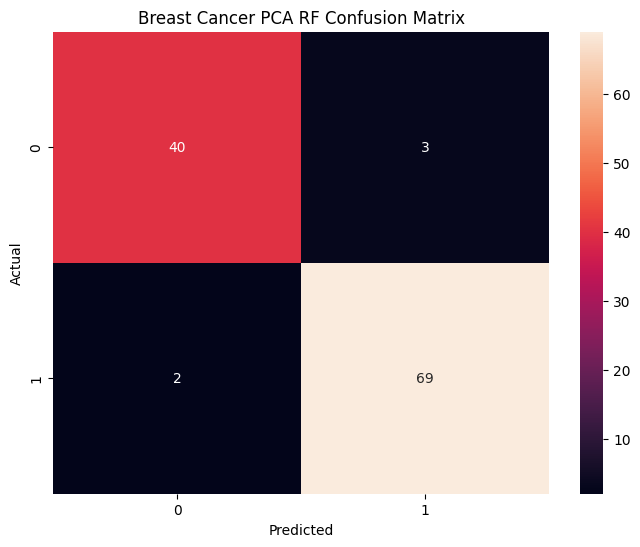

------------------------------
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1-Score: 0.94
------------------------------


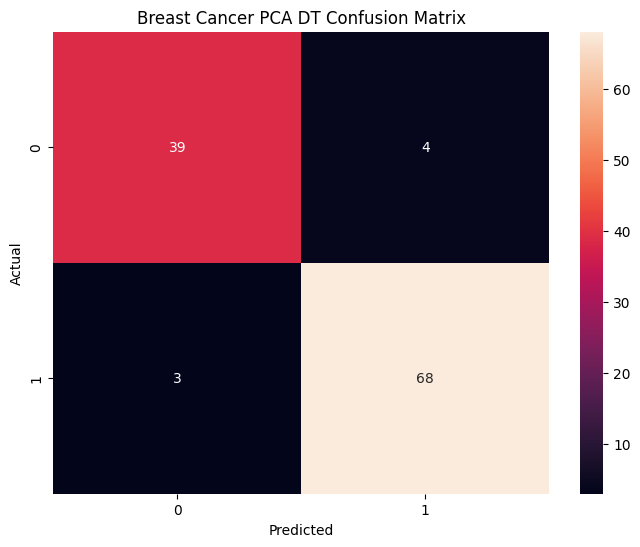

------------------------------
------------------------------
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-Score: 0.98
------------------------------


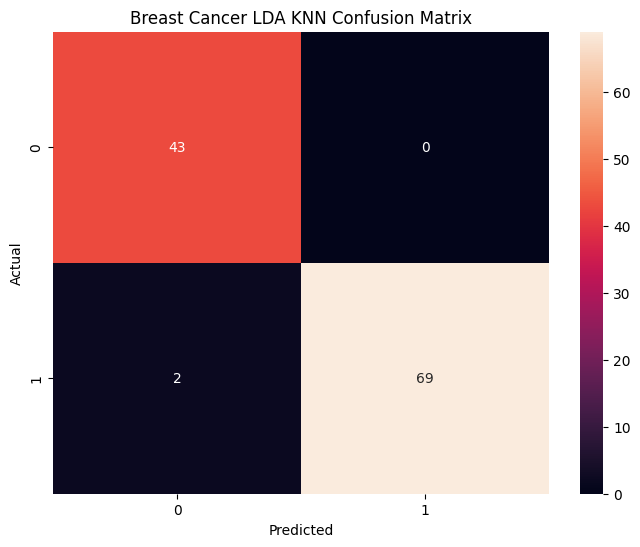

------------------------------
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
------------------------------


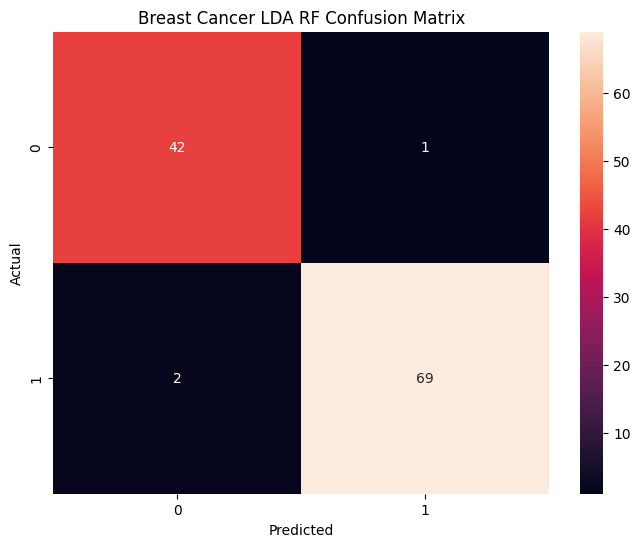

------------------------------
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
------------------------------


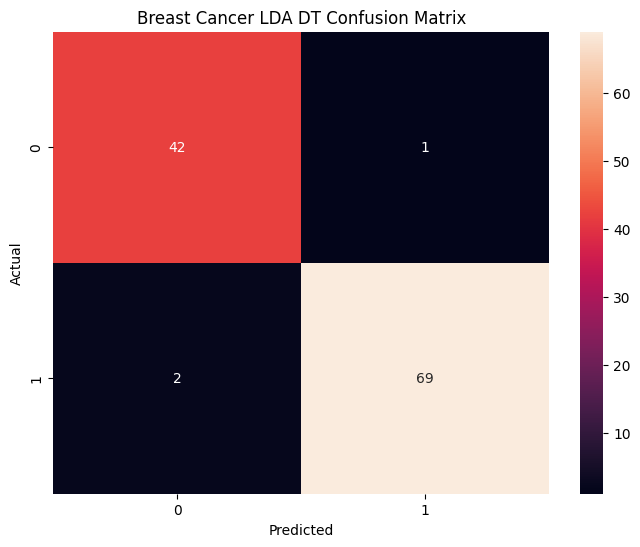

------------------------------


In [124]:
Xiris = iris_data.data
Yiris = iris_data.target
class_func(Xiris,Yiris,"KNN","Iris")
class_func(Xiris,Yiris,"RF","Iris")
class_func(Xiris,Yiris,"DT","Iris")
pca_fun(Xiris,Yiris,"Iris")
lda_func(Xiris,Yiris,"Iris")
print("------------------------------")
XDB = diabetes_df.drop(columns=['Outcome'])
YDB = diabetes_df['Outcome']
class_func(XDB,YDB,"KNN","Diabtes")
class_func(XDB,YDB,"RF","Diabtes")
class_func(XDB,YDB,"DT","Diabtes")
pca_fun(XDB,YDB,"Diabetes")
lda_func(XDB,YDB,"Diabetes")
print("------------------------------")
XBC = breast_cancer_data.data
YBC = breast_cancer_data.target
class_func(XBC,YBC,"KNN","Breast Cancer")
class_func(XBC,YBC,"RF","Breast Cancer")
class_func(XBC,YBC,"DT","Breast Cancer")
pca_fun(XBC,YBC,"Breast Cancer")
lda_func(XBC,YBC,"Breast Cancer")